In [ ]:
from CNN import CNN
import input_data
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
log_period_samples = 20000
batch_size = 100

In [24]:
def get_data():
  return input_data.read_data_sets("MNIST_data/", one_hot=True)


def get_placeholders():
  x = tf.placeholder(tf.float32, [None, 784])
  y_ = tf.placeholder(tf.float32, [None, 10]) 
  return x, y_


def plot_learning_curves(experiment_data):
  
  fig, axes = plt.subplots(3, 1, figsize=(22,12))
  st = fig.suptitle(
      "Learning Curves for all Tasks and Hyper-parameter settings",
      fontsize="x-large")
  
  for i, results in enumerate(experiment_data):
    for j, (setting, train_accuracy, test_accuracy) in enumerate(results):
      
      xs = [x * log_period_samples for x in range(1, len(train_accuracy)+1)]
      axes[j, i].plot(xs, train_accuracy, label='train_accuracy')
      axes[j, i].plot(xs, test_accuracy, label='test_accuracy')
      
      axes[j, i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
      axes[j, i].set_xlabel('Number of samples processed')
      axes[j, i].set_ylabel('Epochs: {}, Learning rate: {}.  Accuracy'.format(*setting))
      axes[j, i].set_title('Task {}'.format(i + 1))
      axes[j, i].legend()
  
  plt.tight_layout()
  st.set_y(0.95)
  fig.subplots_adjust(top=0.91)
  plt.show()


def plot_summary_table(experiment_data):
  
  cell_text = []
  rows = []
  columns = ['Setting 1', 'Setting 2', 'Setting 3']
  for i, results in enumerate(experiment_data):
    rows.append('CNN Model ')
    cell_text.append([])
    for j, (setting, train_accuracy, test_accuracy) in enumerate(results):
      cell_text[i].append(test_accuracy[-1])
 
  fig=plt.figure(frameon=False)
  ax = plt.gca()
  the_table = ax.table(
      cellText=cell_text,
      rowLabels=rows,
      colLabels=columns,
      loc='center')
  the_table.scale(1, 4)
  
  ax.patch.set_facecolor('None')
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)

In [20]:
experiment_data = []
settings = [(1, 0.01), (1, 0.001), (2, 0.001)]

print('Training CNN Model\n')

for num_epochs,LR in settings:

  mnist = get_data()
  eval_mnist = get_data()
  m = CNN()
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)

  while mnist.train.epochs_completed < num_epochs:

    
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    
    
      batch_xs = np.reshape(batch_xs, [-1, 1, 28, 28])
      m.train(batch_xs,batch_ys,LR)

    
      if i % log_period_updates == 0:

      
        a=0.2
        ex = eval_mnist.train.images
        ey = eval_mnist.train.labels
        size = int(ey.shape[0]*a)
        part_ex = ex[0:size,:]    
        part_ey = ey[0:size,:]
        train_x = np.reshape(part_ex, [-1, 1, 28, 28])
        train = m.eval(train_x,part_ey)
        print("%d th iter train accuracy %f" %(i,train)) 
        train_accuracy.append(train)  

      
        test_x = np.reshape(eval_mnist.test.images,[-1, 1, 28, 28])
        test = m.eval(test_x,eval_mnist.test.labels)
        print("%d th iter test accuracy %f" %(i,test))  
        test_accuracy.append(test) 
  experiment_data.append(((num_epochs,LR), train_accuracy, test_accuracy))

Training CNN Model

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz

Convolutional Neural Network layer constructed


Relu activation function constructed


Max Pooling Network layer constructed


Convolutional Neural Network layer constructed


Relu activation function constructed


Max Pooling Network layer constructed


Linear network constructed


Relu activation function constructed


Linear network constructed


Cross-entropy loss function constructed


Softmax activation function constructed

200 th iter train accuracy 0.103818
200 th iter test accuracy 0.102800
400 th iter train accuracy 0.100182
400 th iter test accuracy 0.100900
Extracting MN

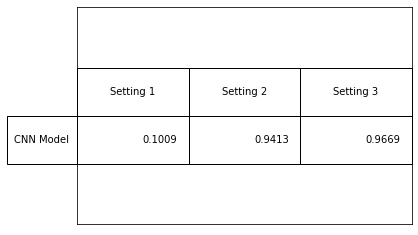

In [25]:
plot_summary_table([experiment_data])